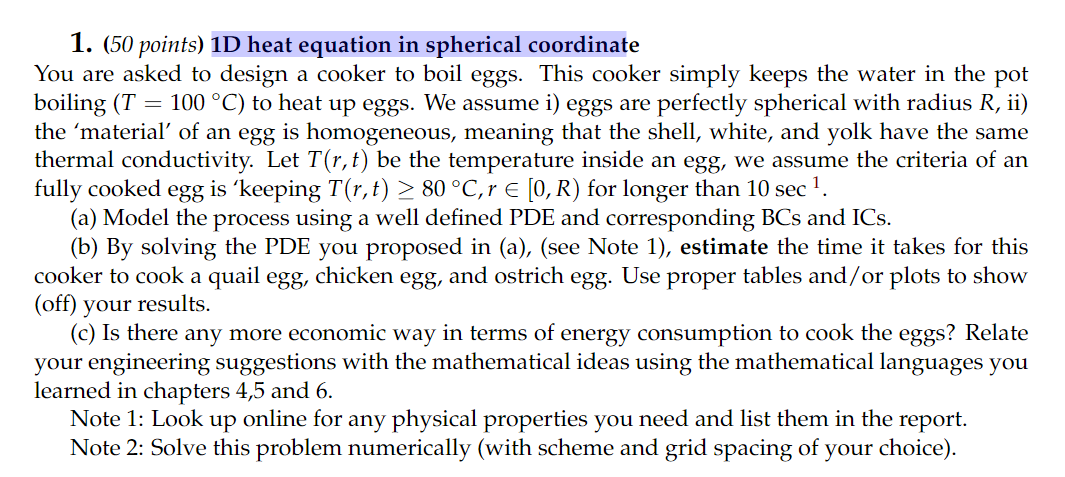

#### Part A
Model the process using a well defined PDE and corresponding BCs and ICs.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

"""
Egg Parameters. 

All eggs are assumed:
- homogenous
- spherical
- at room temperature (20C)
- thermal conductivity, specific heat capacity, and density are assumed to be constant for quail, chicken, and ostrich eggs

Sources:
- https://www.sciencedirect.com/science/article/abs/pii/S0260877405001330
- https://dimensionofstuff.com/what-are-the-dimensions-of-an-egg/
"""
R_chicken = (5.8 + 4) / 4  # nominal chicken egg radius (cm)
R_ostrich = (15.2 + 12.7) / 4  # nominal ostrich egg radius (cm)
R_quail = (3.5 + 2.7) / 4  # nominal quail egg radius (cm)
K = 50  # thermal conductivity (J/s/cm/K)
Cp = 3.15  # specific heat capacity (J/g/K)
P = 1.033e3  # density (g/cm^3)

"""
Simulation parameters and constraints.
Neumann boundary condition doesn't need to be initialized.
""" 
bc_1 = 100  # dirichlet boundary condition 1
bc_2 = 20   # dirichlet boundary condition 2
T_c = 80 # cooking temperature (C)
t_c = 10 # cooking time (s)

def explicit_solver(R, sim_t, dt, dp):
    """
    Explicit solver for 1D heat diffusion + Plotting + Cook Time
    """

    t = np.arange(0, sim_t + dt, dt) # initialize temporal grid
    p = np.arange(0, R + dp, dp) # initialize spatial grid
    n = len(t) # number of time steps
    m = len(p) # number of space steps
    T = np.zeros((n, m + 1))  # initializing temperature matrix, includes ghost node
    T[0, :] = bc_2 # loading boundary condition 2
    T[:, 0] = bc_1 # loading boundary condition 1
    a = (K / (Cp * P)) # thermal diffusivity coefficient

    """
    Checking stability condition of explicit scheme (CFL condition)
    """
    if (- (2 * a * dt) / (dp ** 2) - (2 * a * dt) / (dp ** 2) + 1 ) < 0:
        print("CFL condition is not met --> change grid spacing")
        return

    """
    Explicit scheme
    """
    for i in range(1, n):
        for j in range(1, m):
            T[i, j] = (- (2 * a * dt) / (dp ** 2 * m) - (2 * a * dt) / (dp ** 2) + 1) * T[i - 1, j] + ((a * dt) / dp ** 2) * T[i - 1, j - 1] + ((2 * a * dt) / (dp ** 2 * m) + (a * dt) / (dp ** 2)) * T[i - 1, j + 1]  # explicit scheme
        T[i, -1] = T[i, -3]  # neumann boundary condition
    T = T[:, :-1]  # Remove ghost node

    """
    Find time when egg is cooked or not
    """
    cook_start = 0

    for x in range(1, n):
        if T[x, -1] >= T_c:
            cook_start += 1
        if cook_start*dt >= t_c:
            time = x*dt
            print("Egg is cooked after: ", np.round(time, 3), "seconds")
            plt.plot(T[x, :])
            break

    if (cook_start*dt) < t_c:
        print("Egg is not cooked in given simulation time.")

    """
    Plot 3D surface plot of temperature
    """
    if R == R_chicken:
        egg_type = 'Chicken Egg'
    elif R == R_ostrich:
        egg_type = 'Ostrich Egg'
    else:
        egg_type = 'Quail Egg'

    pp, tt = np.meshgrid(p, t) # Create meshgrid
    T = np.flip(T, axis=1) # Flip matrix for plotting

    fig = plt.figure() 
    ax = fig.add_subplot(111, projection='3d') # Create 3D surface plot
    ax.plot_surface(pp, tt, T, cmap='plasma_r') # Plot the surface

    ax.set_xlabel('Radius (cm)')
    ax.set_ylabel('Time (s)')
    ax.set_zlabel('Temperature (C)')
    ax.zaxis.labelpad = -30
    ax.set_title('1D Heat Diffusion for a(n) {}'.format(egg_type))

    plt.show()
        
    return T

#### Part B
By solving the PDE you proposed in (a), (see Note 1), estimate the time it takes for this
cooker to cook a quail egg, chicken egg, and ostrich egg. Use proper tables and/or plots to show (off) your results.

Egg is cooked after:  220.6 seconds


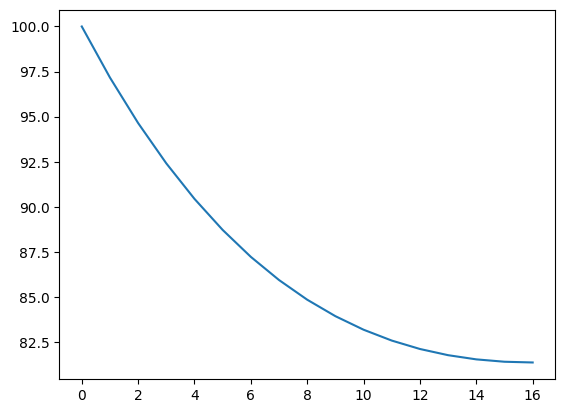

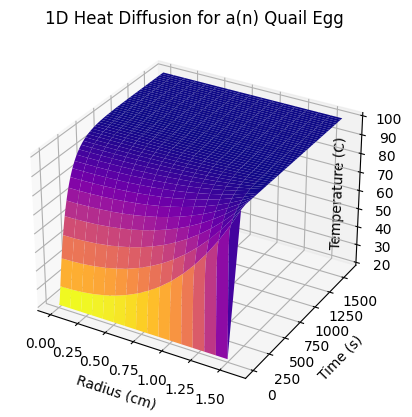

array([[ 20.        ,  20.        ,  20.        , ...,  20.        ,
         20.        , 100.        ],
       [ 20.        ,  20.        ,  20.        , ...,  20.        ,
         32.29275189, 100.        ],
       [ 20.        ,  20.        ,  20.        , ...,  21.88889686,
         40.58548689, 100.        ],
       ...,
       [ 99.99896376,  99.99896602,  99.99897333, ...,  99.9997021 ,
         99.99984243, 100.        ],
       [ 99.99896449,  99.99896675,  99.99897405, ...,  99.99970231,
         99.99984254, 100.        ],
       [ 99.99896523,  99.99896749,  99.99897478, ...,  99.99970252,
         99.99984265, 100.        ]])

In [4]:
# quail egg
explicit_solver(R_quail, 1600, 0.1, 0.1)

Egg is cooked after:  552.7 seconds


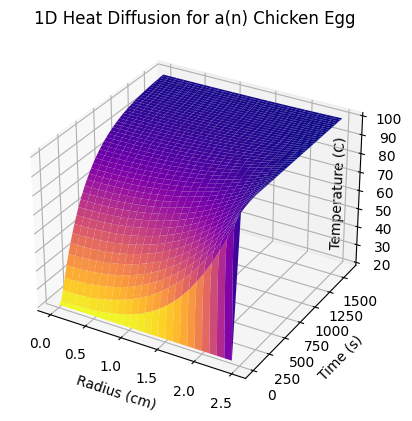

array([[ 20.        ,  20.        ,  20.        , ...,  20.        ,
         20.        , 100.        ],
       [ 20.        ,  20.        ,  20.        , ...,  20.        ,
         32.29275189, 100.        ],
       [ 20.        ,  20.        ,  20.        , ...,  21.88889686,
         40.66241029, 100.        ],
       ...,
       [ 98.90629658,  98.90723869,  98.91020829, ...,  99.7871856 ,
         99.88955666, 100.        ],
       [ 98.90659724,  98.9075391 ,  98.91050789, ...,  99.7872441 ,
         99.88958702, 100.        ],
       [ 98.90689783,  98.90783942,  98.91080739, ...,  99.78730259,
         99.88961737, 100.        ]])

In [4]:
# chicken egg
explicit_solver(R_chicken, 1600, 0.1, 0.1)

Egg is not cooked in given simulation time.


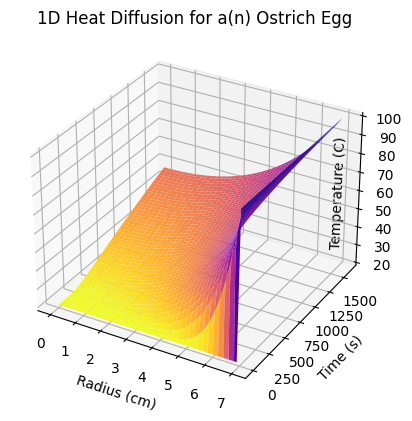

Egg is cooked after:  4560.0 seconds


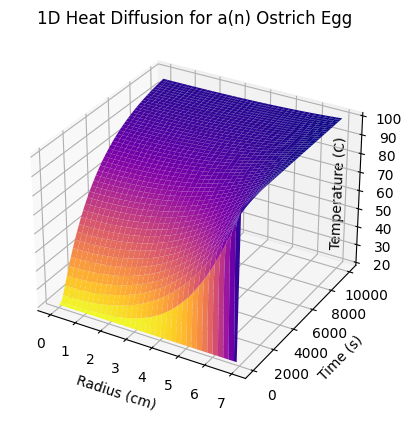

array([[ 20.        ,  20.        ,  20.        , ...,  20.        ,
         20.        , 100.        ],
       [ 20.        ,  20.        ,  20.        , ...,  20.        ,
         32.29275189, 100.        ],
       [ 20.        ,  20.        ,  20.        , ...,  21.88889686,
         40.75450169, 100.        ],
       ...,
       [ 96.6334955 ,  96.63384868,  96.63492807, ...,  99.74920669,
         99.87284838, 100.        ],
       [ 96.63360557,  96.63395874,  96.63503809, ...,  99.74921489,
         99.87285254, 100.        ],
       [ 96.63371563,  96.6340688 ,  96.63514811, ...,  99.74922309,
         99.8728567 , 100.        ]])

In [5]:
# ostrich egg
explicit_solver(R_ostrich, 1600, 0.1, 0.1)
explicit_solver(R_ostrich, 10000, 0.1, 0.1) # longer simulation time

#### Part C
Is there any more economic way in terms of energy consumption to cook the eggs? Relate
your engineering suggestions with the mathematical ideas using the mathematical languages you
learned in chapters 4,5 and 6.

# heating economics

- joules is the metric
- more eggs / heating medium, less loss
- hot fast, vs slow cold
- inductive heating (https://www.kjmagnetics.com/blog.asp?p=induction-stove)

Egg is cooked after:  604.1 seconds


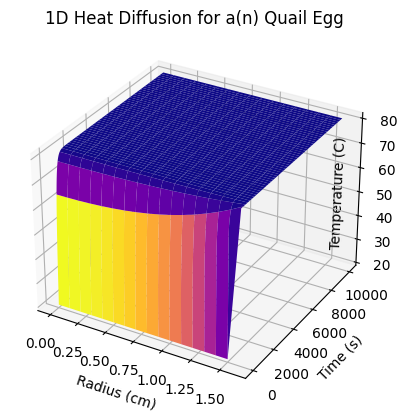

Egg is cooked after:  1543.7 seconds


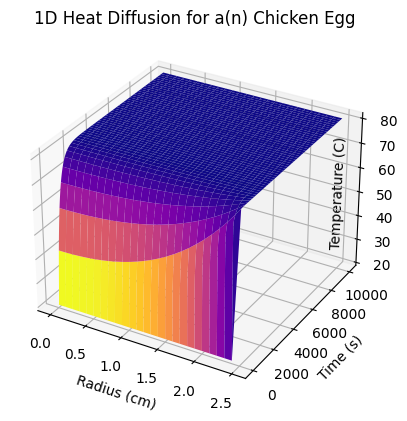

Egg is cooked after:  12893.0 seconds


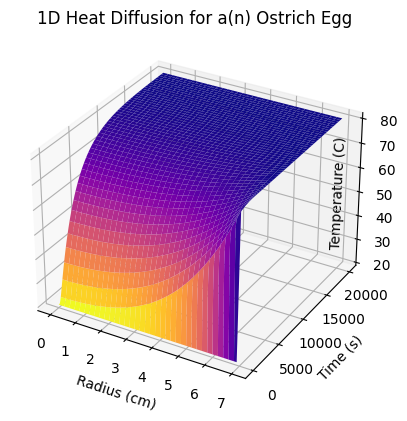

array([[20.        , 20.        , 20.        , ..., 20.        ,
        20.        , 81.        ],
       [20.        , 20.        , 20.        , ..., 20.        ,
        29.37322331, 81.        ],
       [20.        , 20.        , 20.        , ..., 21.44028386,
        35.82530754, 81.        ],
       ...,
       [80.90240192, 80.90241216, 80.90244346, ..., 80.99272927,
        80.99631376, 81.        ],
       [80.90240511, 80.90241535, 80.90244665, ..., 80.99272951,
        80.99631388, 81.        ],
       [80.90240831, 80.90241854, 80.90244983, ..., 80.99272975,
        80.996314  , 81.        ]])

In [6]:
bc_1 = 81

explicit_solver(R_quail, 10000, 0.1, 0.1)
explicit_solver(R_chicken, 10000, 0.1, 0.1)
explicit_solver(R_ostrich, 20000, 0.1, 0.1)

Egg is cooked after:  112.6 seconds


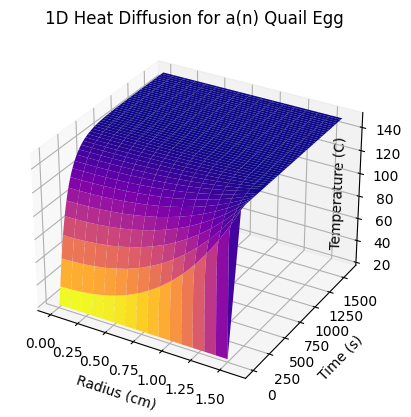

Egg is cooked after:  273.7 seconds


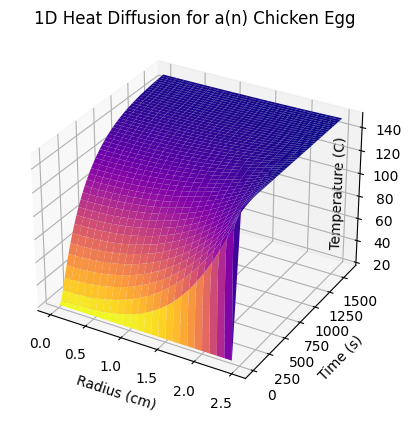

Egg is cooked after:  2213.4 seconds


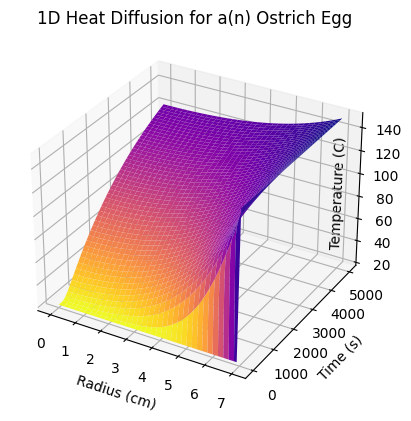

array([[ 20.        ,  20.        ,  20.        , ...,  20.        ,
         20.        , 150.        ],
       [ 20.        ,  20.        ,  20.        , ...,  20.        ,
         39.97572182, 150.        ],
       [ 20.        ,  20.        ,  20.        , ...,  23.0694574 ,
         53.72606524, 150.        ],
       ...,
       [121.94427728, 121.94722067, 121.95621605, ..., 147.90994261,
        148.94034585, 150.        ],
       [121.94519458, 121.94813787, 121.95713296, ..., 147.91001094,
        148.94038049, 150.        ],
       [121.94611185, 121.94905505, 121.95804984, ..., 147.91007928,
        148.94041514, 150.        ]])

In [7]:
bc_1 = 150

explicit_solver(R_quail, 1600, 0.1, 0.1)
explicit_solver(R_chicken, 1600, 0.1, 0.1)
explicit_solver(R_ostrich, 5000, 0.1, 0.1)

Egg is cooked after:  82.5 seconds


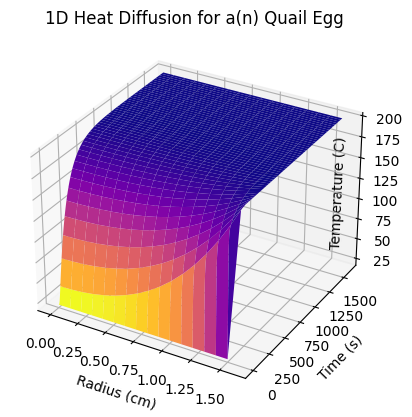

Egg is cooked after:  196.0 seconds


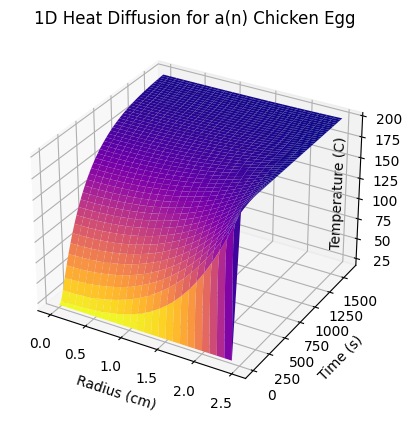

Egg is cooked after:  1560.2 seconds


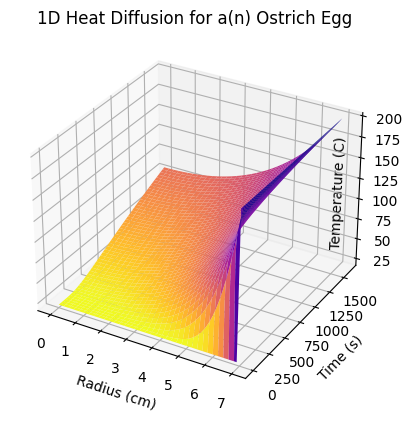

array([[ 20.        ,  20.        ,  20.        , ...,  20.        ,
         20.        , 200.        ],
       [ 20.        ,  20.        ,  20.        , ...,  20.        ,
         47.65869174, 200.        ],
       [ 20.        ,  20.        ,  20.        , ...,  24.25001794,
         66.69762879, 200.        ],
       ...,
       [ 81.92966383,  81.94204961,  81.9799021 , ..., 191.20390201,
        195.54039891, 200.        ],
       [ 81.93352382,  81.9459092 ,  81.98376046, ..., 191.20418974,
        195.54054478, 200.        ],
       [ 81.93738369,  81.94976866,  81.98761868, ..., 191.20447745,
        195.54069066, 200.        ]])

In [8]:
bc_1 = 200

explicit_solver(R_quail, 1600, 0.1, 0.1)
explicit_solver(R_chicken, 1600, 0.1, 0.1)
explicit_solver(R_ostrich, 1600, 0.1, 0.1)

Egg is cooked after:  59.3 seconds


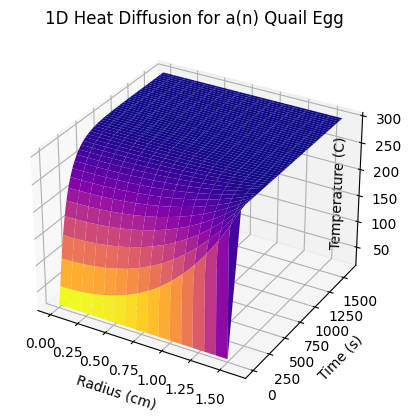

Egg is cooked after:  136.2 seconds


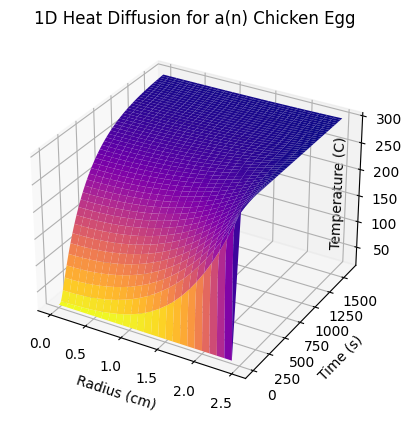

Egg is cooked after:  1057.1 seconds


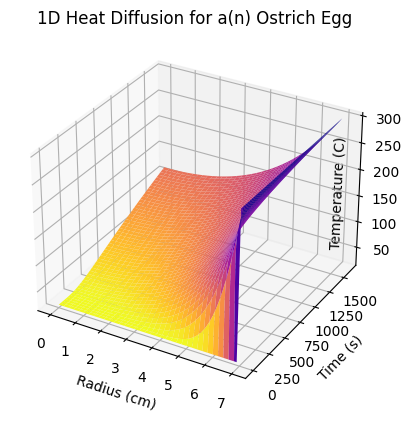

array([[ 20.        ,  20.        ,  20.        , ...,  20.        ,
         20.        , 300.        ],
       [ 20.        ,  20.        ,  20.        , ...,  20.        ,
         63.0246316 , 300.        ],
       [ 20.        ,  20.        ,  20.        , ...,  26.61113902,
         92.6407559 , 300.        ],
       ...,
       [116.33503262, 116.35429939, 116.41318105, ..., 286.3171809 ,
        293.06284274, 300.        ],
       [116.34103706, 116.36030319, 116.41918293, ..., 286.31762848,
        293.06306966, 300.        ],
       [116.34704129, 116.3663068 , 116.42518462, ..., 286.31807604,
        293.06329658, 300.        ]])

In [9]:
bc_1 = 300

explicit_solver(R_quail, 1600, 0.1, 0.1)
explicit_solver(R_chicken, 1600, 0.1, 0.1)
explicit_solver(R_ostrich, 1600, 0.1, 0.1)

Egg is cooked after:  49.5 seconds


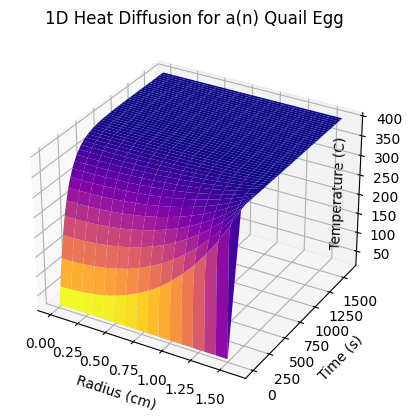

Egg is cooked after:  110.7 seconds


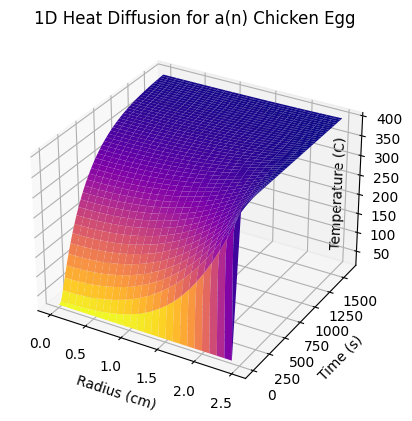

Egg is cooked after:  843.5 seconds


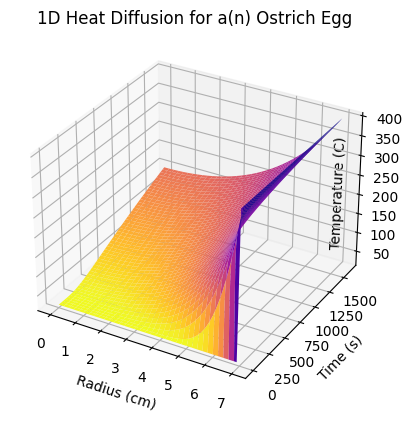

array([[ 20.        ,  20.        ,  20.        , ...,  20.        ,
         20.        , 400.        ],
       [ 20.        ,  20.        ,  20.        , ...,  20.        ,
         78.39057146, 400.        ],
       [ 20.        ,  20.        ,  20.        , ...,  28.97226009,
        118.58388301, 400.        ],
       ...,
       [150.74040142, 150.76654917, 150.84645999, ..., 381.4304598 ,
        390.58528658, 400.        ],
       [150.74855029, 150.77469719, 150.85460541, ..., 381.43106722,
        390.58559454, 400.        ],
       [150.7566989 , 150.78284495, 150.86275056, ..., 381.43167463,
        390.5859025 , 400.        ]])

In [10]:
bc_1 = 400

explicit_solver(R_quail, 1600, 0.1, 0.1)
explicit_solver(R_chicken, 1600, 0.1, 0.1)
explicit_solver(R_ostrich, 1600, 0.1, 0.1)

In [5]:
V_egg = (4 * np.pi * (R_chicken / 10 ** 2) ** 3) / 3
V_cooker = ((R_chicken / 10 ** 2) * 2 + 0.01) ** 3
V_space = V_cooker - V_egg

V_space, V_egg, V_cooker

(0.00014377812764963577, 6.160087235036427e-05, 0.00020537900000000003)

In [6]:
E_min = P * V_egg * Cp * 60

In [10]:
R = 8.314 # J/(mol*K)
M_water = 18.01528e3 # kg/mol
p_water = 998.23 # kg/m^3
latent_heat = 40.8e3 # J/mol
cp_water = 4.186 # J/(g*K)
h = 10 # W/(m^2*K)
SA_cooker = ((R_chicken / 10 ** 2) * 2) ** 2 * 6 # m^2
T_env = 293.15 # K

def water_saturation_pressure(temperature_kelvin):
    A = 8.07131
    B = 1730.63
    C = 233.426

    saturation_pressure_mmHg = 10 ** (A - (B / (temperature_kelvin + C)))
    
    # Convert mmHg to kPa
    saturation_pressure_kPa = saturation_pressure_mmHg * 0.133322
    
    return saturation_pressure_kPa

def energy_consumption(T, t):
    T_K = 273.15 + T # K
    dT = T_K - T_env # J
    P_sat = water_saturation_pressure(T_K)
    n_water = P_sat * V_space / (R * T_K) # mol 
    m_water = n_water * M_water # kg

    latent_heat_vap = latent_heat * n_water # J/mol
    init_heat = m_water * cp_water * dT # J
    maintain_heat = h * SA_cooker * dT # J

    Total_E  = init_heat + latent_heat + maintain_heat
    return Total_E

In [16]:
energy_consumption(400, 136)

183491.88365828534

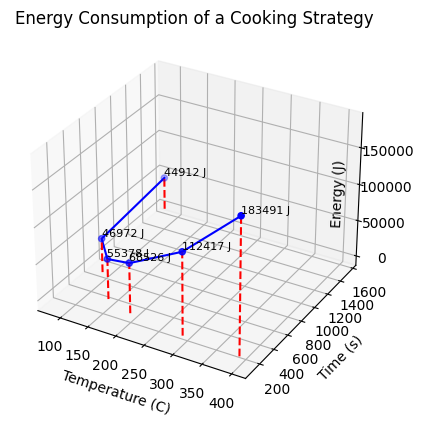

In [31]:
# Data
T = [82, 100, 150, 200, 300, 400]
t = [1543.7, 552.7, 273.7, 196.0, 136.2, 110.7]
E = [44912, 46972, 55378, 68526, 112417, 183491]

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the scatter points
ax.scatter(T, t, E, c='b', marker='o')

# Connect the points with lines along the z-axis
ax.plot(T, t, E, c='b')

# Plot vertical lines from the XY plane
for i in range(len(T)):
    ax.plot([T[i], T[i]], [t[i], t[i]], [0, E[i]], c='r', linestyle='dashed')
    ax.text(T[i], t[i], E[i], f'{E[i]} J', fontsize=8, ha='left', va='bottom')

# Set labels for the axes
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Time (s)')
ax.set_zlabel('Energy (J)')
ax.zaxis.labelpad = -30

# Set a title for the plot
ax.set_title('Energy Consumption of a Cooking Strategy')

# Show the plot
plt.show()